In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import random
from sklearn.metrics import mean_squared_error
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf


In [2]:
from tensorflow.python.client import device_lib
print("Num GPUs Available: ", tf.config.experimental.list_physical_devices('GPU'), tf.test.gpu_device_name())
print(device_lib.list_local_devices(), tf.test.is_gpu_available())

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] /device:GPU:0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15339572299082753886
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6963920896
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7964883574709407690
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
] True


In [3]:
from model import data_normalize, flatten, DE_Learner, split_final
matplotlib.rcParams.update({'font.size': 8})
output ='./wave/'

#### 1D Wave Equation
$u_{tt} = cu_{xx}$

In [4]:
def u(x,t):
    return [0.5*(np.sin(4*np.pi*xi+t) + np.sin(4*np.pi*xi-t)) for xi in x ]
def wave(dx, dt, nx, nt, plot = 0 ):
    T = dt*nt
    x0 = np.linspace(0,nx*dx,nx+1)
    t = np.linspace(0,nt*dt,nt+1)
    wave_dat = np.array(u(x0,t))
    print('wave data shape: ', wave_dat.shape)
    if plot:
        fig = plt.figure()
        ax1 = fig.add_subplot(211)
        ax1.plot(x0,u(x0,0))
        ax1.tick_params(labelsize= 15)
        ax1.set_title('Initial Condition')
        fig2 = plt.figure()
        ax2 = fig2.add_subplot(212)
        ax2.plot(x0,u(x0,T))
        ax2.set_title('Final State t=: '+str(T))
        ax2.tick_params(labelsize= 15)
        plt.ylim(-1,1)
        plt.show()
    return wave_dat

wave data shape:  (101, 201)
###########################START##########################
Whole data size(batch, row, column) (121, 101, 30) (121, 101, 10)
Train data size(batch, row, column) (96, 101, 30) (96, 101, 10)
test data size(batch, row, column) (25, 101, 30) (25, 101, 10)
Epoch 1/20
38/38 [==============================] - 6s 48ms/step - loss: 0.0560 - val_loss: 0.0181
Epoch 2/20
38/38 [==============================] - 1s 18ms/step - loss: 0.0134 - val_loss: 0.0044
Epoch 3/20
38/38 [==============================] - 1s 18ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 4/20
38/38 [==============================] - 1s 18ms/step - loss: 8.9316e-04 - val_loss: 6.6975e-04
Epoch 5/20
38/38 [==============================] - 1s 17ms/step - loss: 5.5119e-04 - val_loss: 4.8074e-04
Epoch 6/20
38/38 [==============================] - 1s 18ms/step - loss: 4.3533e-04 - val_loss: 5.4687e-04
Epoch 7/20
38/38 [==============================] - 1s 18ms/step - loss: 3.9700e-04 - val_loss: 4.155

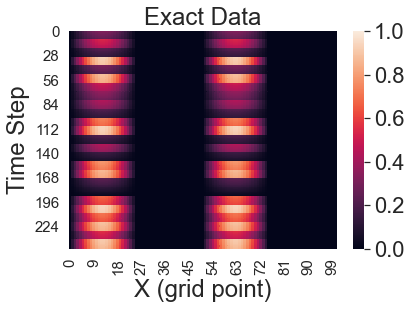

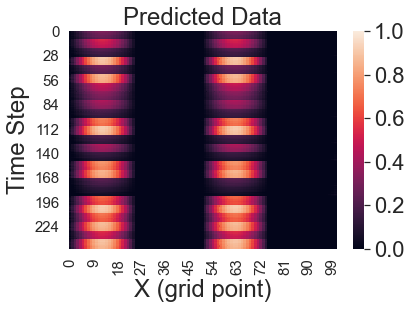

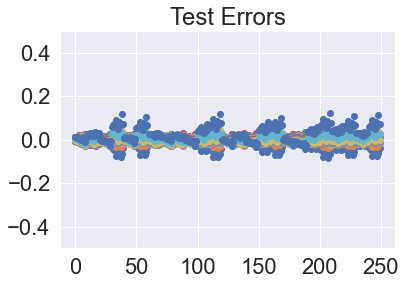

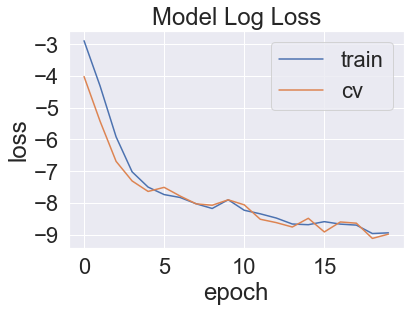

----------------MSE:  0.00011485088707495758
###########################END##########################


In [5]:
T = 2.0
X = 1.0
dt = 0.01
dx = 0.01
#seq2seq train
t1, t2 = 30, 10
N = 20
nx = int(X / dx)
nt = int(T / dt)
wave_dat = wave(dx,dt,nx, nt, 0)
wave_final_x, wave_final_y, wave_dat = split_final(wave_dat, t1, t2)
wave_py, wave_ty,wave_mse, wavemodel = DE_Learner(wave_dat, t1, t2, 1 , .2, N, 'wave', plot = 1)

In [29]:
wave_final_pred = wavemodel.predict(wave_final_x,verbose=1)
wave_final_py = np.array(flatten(wave_final_pred)).T
wave_final_ty = np.array(flatten(wave_final_y)).T

1/1 [==============================] - 1s 1s/step


1850
1000 1000


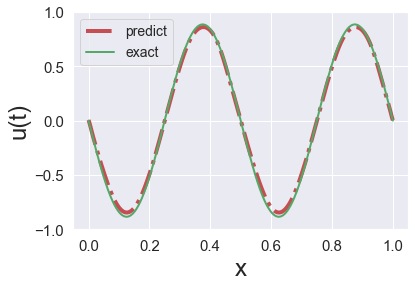

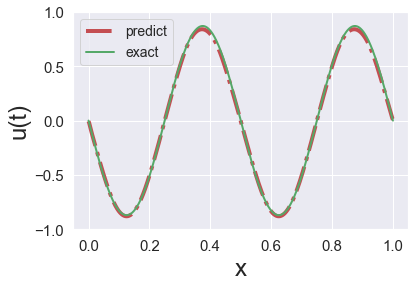

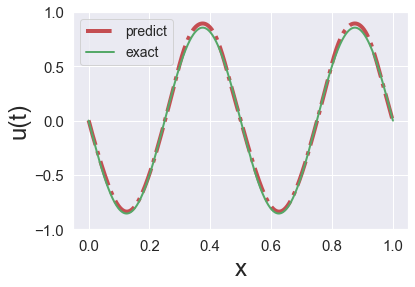

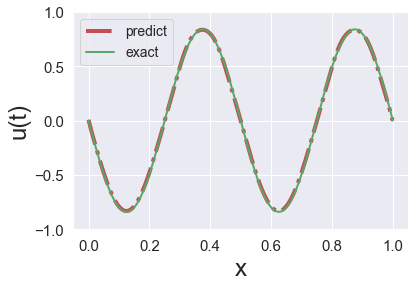

In [31]:
print(len(wave_py))
print(nx, nt)
wave_idx = [0, 3, 6, 9]
for i in wave_idx:
    fg_wave = plt.figure()
    plt.plot(np.linspace(0,nx*dx, nx+1),wave_final_py[i],c='r',linestyle='-.',linewidth=4.0,label = 'predict')
    plt.plot(np.linspace(0,nx*dx, nx+1),wave_final_ty[i],c='g',linewidth=2.0, label = 'exact')
    plt.ylim(-1,1)
    plt.ylabel('u(t)')
    plt.xlabel('x')
    plt.legend(prop={'size': 14})
    fg_wave.savefig(output +'wave_final_'+str(i) + 't_' + str(T-(9-i)*dt)+'.pdf', bbox_inches='tight')